# SHAP Explainer

SHAP values and feature importance interpretation for best model.

In [1]:
import joblib
import pandas as pd
import shap
import numpy as np

def explain_model(model_path, model_features):
    best_model = joblib.load(model_path)

    # Load data
    df = pd.read_csv(model_features, parse_dates=["month"])
    features = [c for c in df.columns if c.startswith("topic_") or c.startswith("publication_")] + ["sentiment"]
    split_idx = int(len(df) * 0.8)
    X_test = df[features].iloc[split_idx:].copy()

    # Clean features
    X_test = X_test.apply(pd.to_numeric, errors='coerce').fillna(0).astype(np.float64)

    # Setup masker and explainer with callable prediction function
    masker = shap.maskers.Independent(X_test)
    explainer = shap.Explainer(best_model.predict, masker)

    # Compute SHAP values
    shap_values = explainer(X_test)

    # Plot
    shap.plots.beeswarm(shap_values)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Permutation explainer: 253it [00:31,  5.98it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


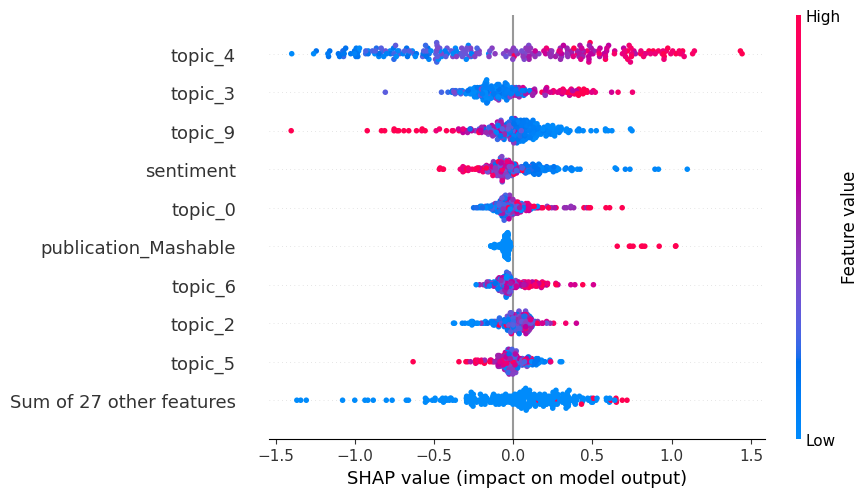

In [2]:
explain_model(
    model_path="../models/best_model_lda.joblib",
    model_features="../data/processed/features_lda_monthly.csv"
)

Permutation explainer: 251it [01:22,  2.65it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


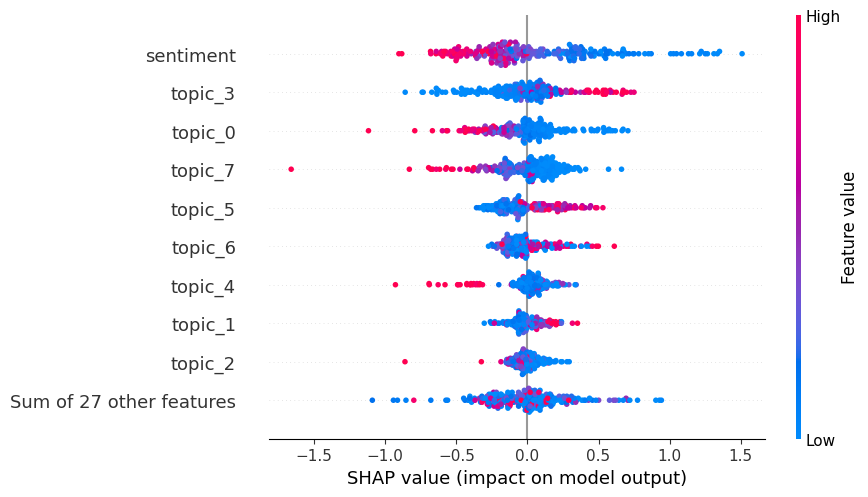

In [3]:
explain_model(
    model_path="../models/best_model_bertopic.joblib",
    model_features="../data/processed/features_bertopic_monthly.csv"
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


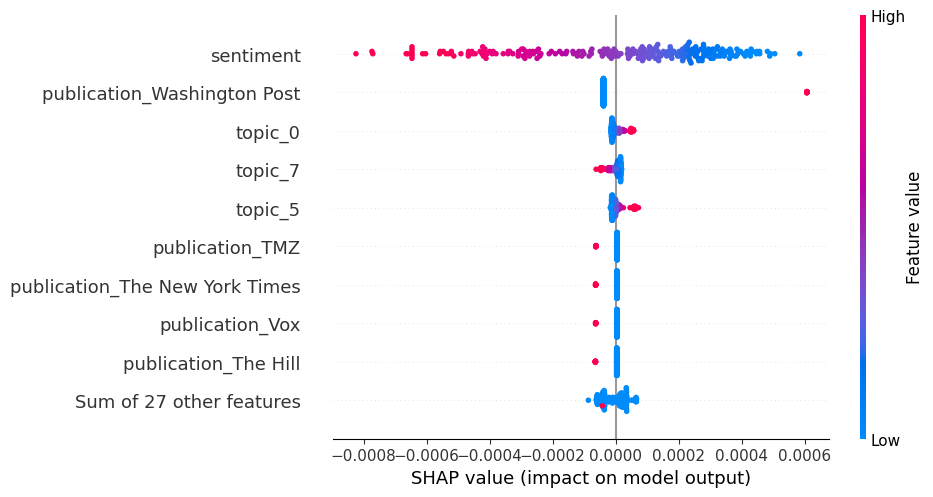

In [4]:
explain_model(
    model_path="../models/best_model_slda.joblib",
    model_features="../data/processed/features_slda_monthly.csv",
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


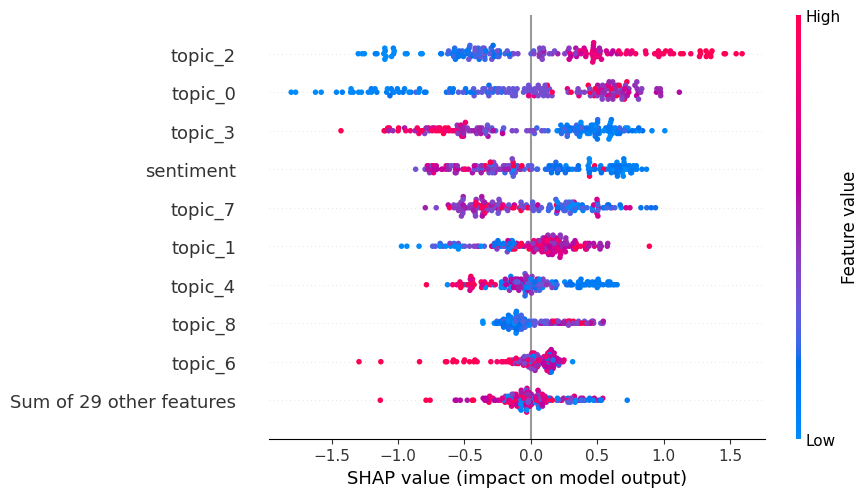

In [5]:
explain_model(
    model_path="../models/best_model_tinyllm.joblib",
    model_features="../data/processed/features_tinyllm_monthly.csv",
)